# [[Dacon] 서울시 따릉이 대여량 예측 경진대회](https://dacon.io/competitions/open/235576/overview/description)
- id 고유 id
- hour 시간
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수

## 1. EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df= pd.read_csv(os.getcwd() + '/data/bike/train.csv').drop('id',axis=1)
display(df.head())
print(df.info())
print(df.shape)
display(df.describe())

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1457 non-null   float64
 2   hour_bef_precipitation  1457 non-null   float64
 3   hour_bef_windspeed      1450 non-null   float64
 4   hour_bef_humidity       1457 non-null   float64
 5   hour_bef_visibility     1457 non-null   float64
 6   hour_bef_ozone          1383 non-null   float64
 7   hour_bef_pm10           1369 non-null   float64
 8   hour_bef_pm2.5          1342 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB
None
(1459, 10)


,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [46]:
# 결측치 확인
df.isna().sum()

hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [2]:
# 결측치 대체
miss_cols = ['hour_bef_temperature', 'hour_bef_windspeed',  'hour_bef_humidity', 
             'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
for col in miss_cols: # 연속형 변수
#     df.loc[df[col].isna(), col] = np.mean(df[col])
    df[col] = df[col].fillna(value=df[col].mean())

import scipy.stats as stats
mode=int(stats.mode(df['hour_bef_precipitation'])[0])
df.loc[df['hour_bef_precipitation'].isna(), 'hour_bef_precipitation'] = mode # 범주형 변수

df.isna().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

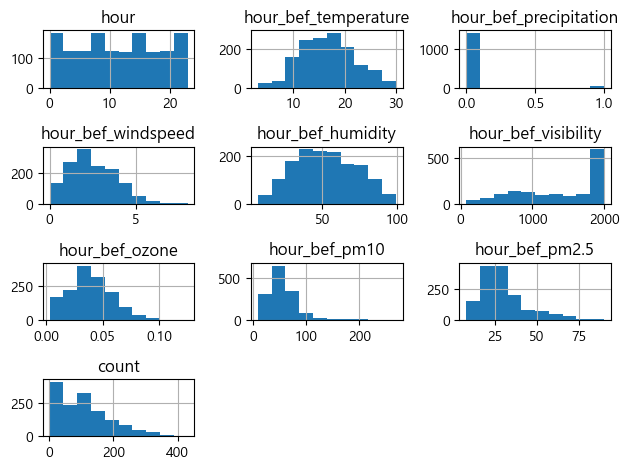

In [48]:
df.hist()
plt.tight_layout();

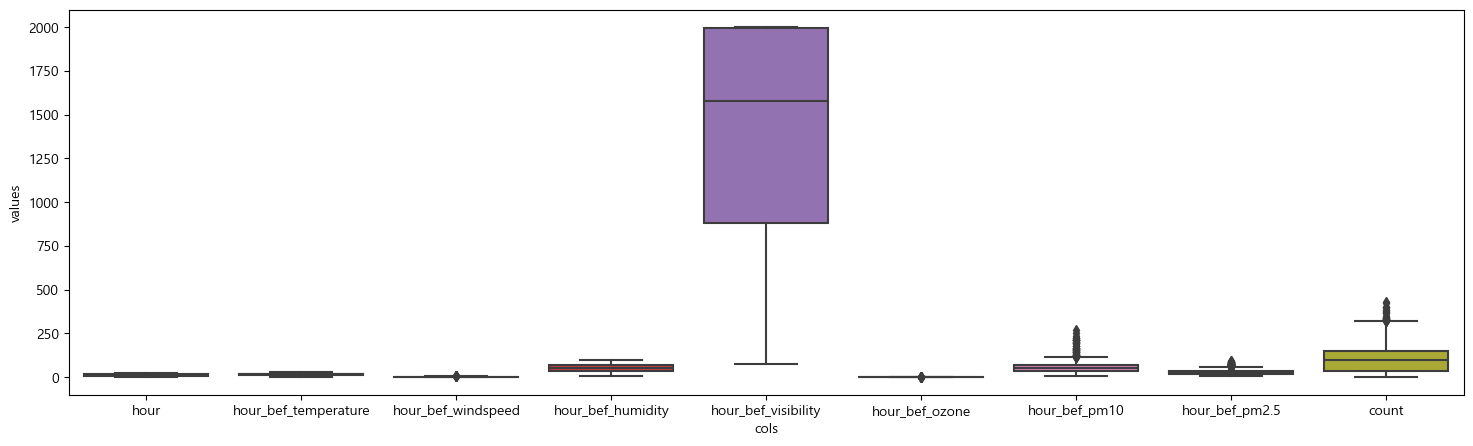

In [49]:
# 이상치 확인을 위한 상자 그림 도출
df_v1 = pd.melt(df.drop('hour_bef_precipitation', axis=1), var_name='cols', value_name='values')
plt.figure(figsize=(18,5))
sns.boxplot(data=df_v1, x='cols', y='values');

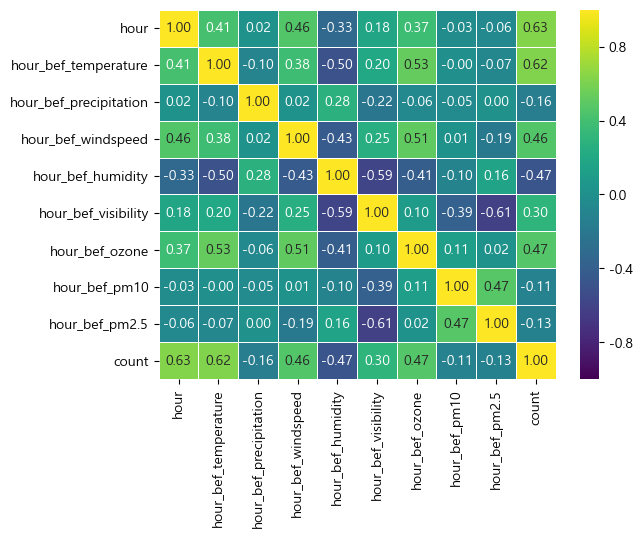

In [50]:
df_corr = df.corr()
sns.heatmap(df_corr, cmap='viridis', annot=True, vmax=1, vmin=-1, linewidth=0.4, fmt='.2f');

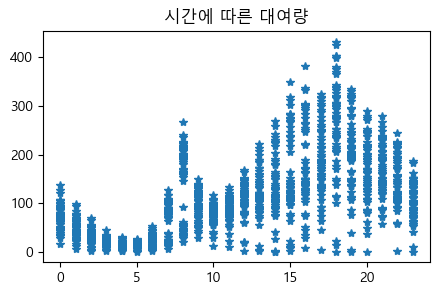

In [64]:
plt.figure(figsize=(5,3))
plt.plot('hour', 'count', '*', data = df)
plt.title('시간에 따른 대여량');

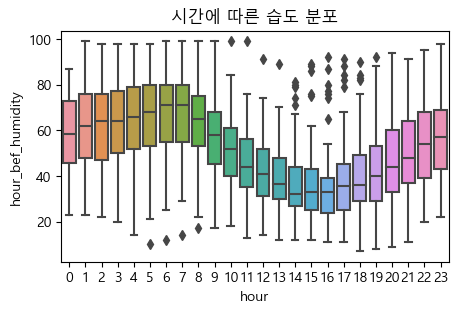

In [67]:
plt.figure(figsize=(5,3))
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = df)
plt.title('시간에 따른 습도 분포');

[해석]
1. 결측치 존재 여부
    - hour_bef_temperature: 2
    - hour_bef_precipitation: 2
    - hour_bef_windspeed: 9
    - hour_bef_humidity: 2
    - hour_bef_visibility: 2
    - hour_bef_ozone: 76
    - hour_bef_pm10: 90
    - hour_bef_pm2.5: 117
    - 위 변수들이 결측치가 있는 변수들인데 precipitation은 0 또는 1로 나누어진 범주형 변수이므로 최빈값으로 대체할 수 있고, 나머지 변수는 평균 또는 중앙값으로 대체할 수 있다. 본 분석에서 precipitation은 최빈값인 0으로, 나머지 연속형 변수는 평균으로 대체하였다.
1. 데이터 타입
    - precipitation은 float형이지만 범주형 변수이므로 모델 구현 시에 주의해야 할 것이다. hour 변수는 int형이고, 나머지 변수들은 float형으로 구성되어 있다.
1. 종속변수와 독립변수의 상관관계
    - count와 상관관계를 확인해 보았을 때, 수치형 변수에는 큰 상관성이 없었다. 가장 높은 상관계수는 count와 hour의 관계(0.63)로 나타났다.
1. 독립변수 간 상관관계
    - 독립변수들끼리 상관관계를 확인해봤을 때, 다중공선성을 의심할 정도로 상관성이 높은 관계는 보이지 않았다.
1. 유의할 점
    - 독립변수들 간 값의 범위가 상이하므로 스케일링을 통해 범위를 통일할 필요가 있다.

## 2. 통계분석(유의수준 0.05)
### 2.1 z-검정
- 귀무가설: 평균 기온은 17도이다.
- 대립가설: 평균 기온은 17도가 아니다.

In [3]:
import scipy.stats as stats
def pmean_var(sample, mean0, p_var, alpha=.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)
    
    z = (s_mean - mean0) / np.sqrt(p_var / n)
    if interval[0] <= z <= interval[1]: print('귀무가설 채택')
    else: print('귀무가설 기각')
        
    if z < 0: p = rv.cdf(z) * 2
    else: p = (1-rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')

np.random.seed(1234)
sample = np.random.choice(df['hour_bef_temperature'], 45)
p_var = np.var(df['hour_bef_temperature'])

pmean_var(sample, 17, p_var)
print('-'*20, '\n<신뢰구간>')
print('CI:', stats.norm.interval(alpha=0.95, loc=np.mean(sample), scale=np.sqrt(p_var/len(sample))))
print(f'μ0인 17이 신뢰구간에 포함하므로 귀무가설을 채택할 수 있음.')

print('-'*20, '\n<검정통계량과 z-score 비교>')
s_mean=np.mean(sample)
u_var = np.var(sample, ddof=1)
n = len(sample)
z = (s_mean-17) / np.sqrt(p_var/len(sample))
print(f'검정통계량 z값(=|{round(z, 4)}|) < z(0.025)(={round(stats.norm.isf(0.025), 4)}) 이므로 귀무가설을 채택함.')

귀무가설 채택
p값은 0.253
-------------------- 
<신뢰구간>
CI: (14.579719091638568, 17.638058686139214)
μ0인 17이 신뢰구간에 포함하므로 귀무가설을 채택할 수 있음.
-------------------- 
<검정통계량과 z-score 비교>
검정통계량 z값(=|-1.1422|) < z(0.025)(=1.96) 이므로 귀무가설을 채택함.


### 2.2 일표본 t-검정(유의수준 0.05)
- 귀무가설: 평균 풍속은 2.3이다.
- 대립가설: 평균 풍속은 2.3이 아니다.

In [6]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean=np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)
    
    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]: print('귀무가설 채택')
    else: print('귀무가설 기각')
        
    if t < 0: p = rv.cdf(t) * 2
    else: p = (1-rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

np.random.seed(1234)
sample = np.random.choice(df['hour_bef_windspeed'], 18)
pmean_test(sample, 2.3)
print('-'*20, '\n<신뢰구간>')
print('CI:', stats.t.interval(alpha=0.95, df=len(sample)-1, loc=np.mean(sample), scale=stats.sem(sample)))
print(f'μ0인 2.3이 신뢰구간에 포함하므로 귀무가설을 채택할 수 있음.')

print('-'*20, '\n<검정통계량과 t-score 비교>')
s_mean=np.mean(sample)
u_var = np.var(sample, ddof=1)
n = len(sample)
t = (s_mean - 2.3) / np.sqrt(u_var/n)
print(f'검정통계량 t값(={round(t, 4)}) < t(0.025, {n})(={round(stats.t(n-1).isf(0.025), 4)}) 이므로 귀무가설을 채택함.')

귀무가설 채택
p값은 0.229
-------------------- 
<신뢰구간>
CI: (2.0004841173743437, 3.466182549292324)
μ0인 2.3이 신뢰구간에 포함하므로 귀무가설을 채택할 수 있음.
-------------------- 
<검정통계량과 t-score 비교>
검정통계량 t값(=1.2475) < t(0.025, 18)(=2.1098) 이므로 귀무가설을 채택함.


In [20]:
# stats 패키지를 활용한 검정(간단함)
stats.shapiro(sample) # 정규성 만족
stats.ttest_1samp(sample, popmean=2.3) # 일표본 t검정

Ttest_1sampResult(statistic=1.247532776390672, pvalue=0.2291146365851779)

### 2.3 독립표본 t-검정(유의수준 0.05)
- 귀무가설: 두 집단의 평균 습도에 차이가 없다.
- 대립가설: 두 집단의 평균 습도에 차이가 있다.

In [49]:
np.random.seed(1234)
a_sample = np.random.choice(df['hour_bef_humidity'], 23)
b_sample = np.random.choice(df['hour_bef_humidity'], 21)

# stats 패키지를 활용한 검정(간단함)
stats.shapiro(a_sample) # 정규성 만족
stats.shapiro(b_sample) # 정규성 만족
stats.levene(a_sample, b_sample) # 등분산성 불만족
t, p = stats.ttest_ind(a_sample, b_sample, equal_var=False) # 두 집단의 평균 습도에 차이가 없다.
print('<stats 패키지를 이용한 검정(간단함)>')
print(f'p-value({round(p, 4)}) > 0.05 이므로 귀무가설을 채택할 수 있다.')

def sp(data1, data2):
    df = len(data1) + len(data2) - 2
    s1 = (len(data1)-1) * (data1.std()**2)
    s2 = (len(data2)-1) * (data2.std()**2)
    sp = np.sqrt((s1+s2)/df)
    return sp
alpha=0.95
dof = len(a_sample) + len(b_sample)-2
diff_mean = np.mean(a_sample) - np.mean(b_sample)
s = sp(a_sample, b_sample)*(1/len(a_sample) + 1/len(b_sample))
print('-'*20, '\n<신뢰구간>')
print('CI:', stats.t.interval(alpha, dof, loc=diff_mean, scale=s))
print(f'두 집단의 평균 차이가 {round(diff_mean, 4)}인데, 신뢰구간에 포함하므로 귀무가설을 채택할 수 있음.')

print('-'*20, '\n<검정통계량과 t-score 비교>')
t = diff_mean / sp(a_sample, b_sample) / (1/len(a_sample) + 1/len(b_sample))**0.5
print(f'검정통계량 t값(=|{round(t, 4)}|) < t(0.025, {dof})(={round(stats.t(dof).isf(0.025), 4)}) 이므로 귀무가설을 채택함.')

<stats 패키지를 이용한 검정(간단함)>
p-value(0.073) > 0.05 이므로 귀무가설을 채택할 수 있다.
-------------------- 
<신뢰구간>
CI: (-14.013186897697967, -7.253893847643648)
두 집단의 평균 차이가 -10.6335인데, 신뢰구간에 포함하므로 귀무가설을 채택할 수 있음.
-------------------- 
<검정통계량과 t-score 비교>
검정통계량 t값(=|-1.9165|) < t(0.025, 42)(=2.0181) 이므로 귀무가설을 채택함.


### 2.4 분산분석
- 귀무가설: 두 집단 간 따릉이 대여수에 차이가 없다.
- 대립가설: 두 집단 간 따릉이 대여수에 차이가 있다.

In [70]:
np.random.seed(1234)
sample_0 = np.random.choice(df.loc[df['hour_bef_precipitation']==0, 'count'], 40)
sample_1 = np.random.choice(df.loc[df['hour_bef_precipitation']==1, 'count'], 40)

stats.shapiro(sample_0) # 정규성 만족 못함.
stats.shapiro(sample_1) # 정규성 만족 못함.
chi, p = stats.kruskal(sample_0, sample_1) # 크루스칼 왈리스 검정
print('<stats 패키지를 이용한 검정(간단함)>')
print(f'p-value({round(p, 4)}) < 0.05 이므로 귀무가설을 기각할 수 있다.')

<stats 패키지를 이용한 검정(간단함)>
p-value(0.0) < 0.05 이므로 귀무가설을 기각할 수 있다.


,col,value
0,value_1,111.0
1,value_1,39.0
2,value_1,46.0
3,value_1,1.0
4,value_1,2.0


group1,group2,meandiff,p-adj,lower,upper,reject
value_0,value_1,-97.375,0.0,-128.1338,-66.6162,True


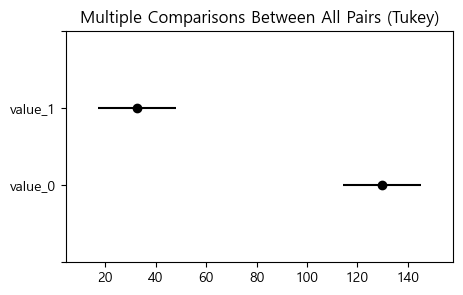

In [98]:
# 사후 검정을 위한 데이터 전처리
anova_df = pd.DataFrame(sample_0, sample_1).reset_index()
anova_df.columns = ['value_1', 'value_0']
anova_df = pd.melt(anova_df, var_name='col', value_name='value')
display(anova_df.head())

# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data=anova_df['value'], groups=anova_df['col'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous(figsize=(5,3))
display(tukeyhsd.summary())

### 2.5 회귀분석

In [61]:
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
df_reg = pd.get_dummies(data=df,columns=['hour_bef_precipitation'], drop_first=True)
df_reg.head()

# 독립변수 특수 문자 제거
df_reg.columns = df_reg.columns.str.replace('.', '') 

# 다중 회귀 분석
df_reg.columns = df_reg.columns.str.replace('.', '')
model = smf.ols(formula = 'count ~ hour + hour_bef_temperature + hour_bef_windspeed + hour_bef_humidity + hour_bef_visibility \
                + hour_bef_ozone + hour_bef_pm10 + hour_bef_pm25 + hour_bef_precipitation_10', data=df_reg)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     241.7
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          5.24e-281
Time:                        15:17:00   Log-Likelihood:                -7841.6
No. Observations:                1459   AIC:                         1.570e+04
Df Residuals:                    1449   BIC:                         1.576e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [62]:
# 다중공선성 확인
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
y, X = dmatrices('count ~ hour + hour_bef_temperature + hour_bef_windspeed + hour_bef_humidity + hour_bef_visibility \
                + hour_bef_ozone + hour_bef_pm10 + hour_bef_pm25 + hour_bef_precipitation_10', data = df_reg,
               return_type = 'dataframe')

# 독립변수들끼리의 vif 값을 계산하여 데이터프레임으로 만드는 과정
vif_lst = []
for i in range(1, len(X.columns)):
    vif_lst.append([variance_inflation_factor(X.values,i), X.columns[i]])
pd.DataFrame(vif_lst, columns=['vif', 'variable']).sort_values('vif', ascending=False)

,vif,variable
4,3.324429,hour_bef_visibility
3,2.994258,hour_bef_humidity
7,1.960952,hour_bef_pm25
5,1.732962,hour_bef_ozone
1,1.732478,hour_bef_temperature
2,1.711665,hour_bef_windspeed
6,1.601130,hour_bef_pm10
0,1.410419,hour
8,1.135485,hour_bef_precipitation_10


### 2.6 단순 선형 회귀 분석

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     410.2
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.45e-80
Time:                        15:18:41   Log-Likelihood:                -8329.4
No. Observations:                1459   AIC:                         1.666e+04
Df Residuals:                    1457   BIC:                         1.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         28.7348      4.380      6.

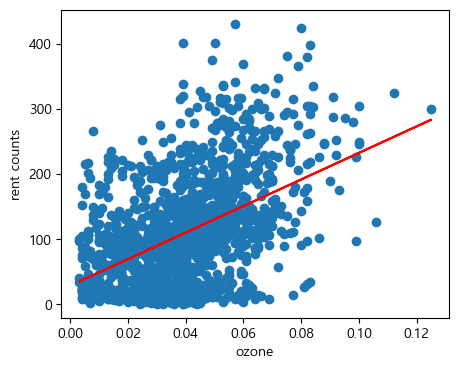

In [66]:
from statsmodels.formula.api import ols
X = df_reg['hour_bef_ozone']
y = df_reg[['count']]

lr = ols('count ~ hour_bef_ozone', data=df_reg).fit()
print(lr.summary())

y_pred = lr.predict(X)
plt.figure(figsize=(5,4))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('ozone')
plt.ylabel('rent counts')
plt.show()

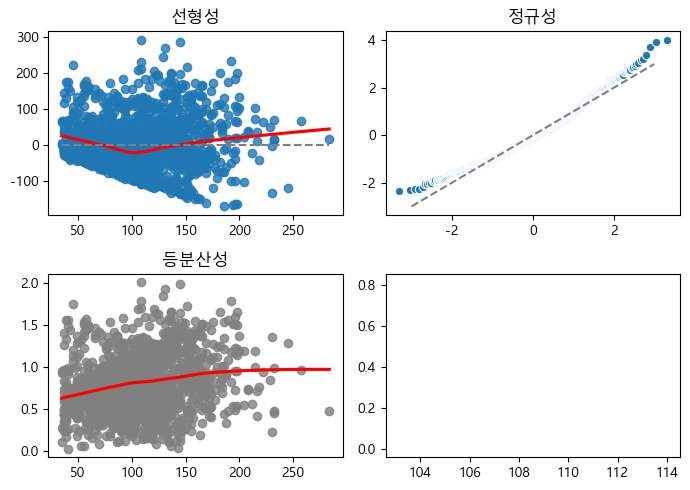

In [94]:
# 회귀분석 가정
fig, ax = plt.subplots(2, 2, figsize = (7, 5))

residual = df_reg['count'] - y_pred
sns.regplot(y_pred, residual, lowess=True, line_kws={'color': 'red'}, ax=ax[0][0])
ax[0][0].plot([y_pred.min(), y_pred.max()], [0,0], '--', color='grey')
ax[0][0].set_title('선형성')

sr = stats.zscore(residual)
(x, y), _ = stats.probplot(sr)
sns.scatterplot(x, y, ax=ax[0][1])
ax[0][1].plot([-3, 3], [-3, 3], '--', color='grey')
ax[0][1].set_title('정규성')

sns.regplot(y_pred, np.sqrt(np.abs(sr)), lowess=True, line_kws= {'color':'red'}, scatter_kws={'color':'gray'}, ax=ax[1][0])
ax[1][0].set_title('등분산성')

plt.tight_layout();

### 3. 머신러닝(모델 구현 및 성능비교)

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

# 데이터 분할
X = df.drop(columns = ['count'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# 스케일링 및 인코더
num_cols = X.drop(['hour_bef_precipitation'], axis=1).columns
cate_cols = ['hour_bef_precipitation']
column_trans = ColumnTransformer([
    ('num', StandardScaler(), num_cols), ('cate', OneHotEncoder(sparse=False, handle_unknown='ignore'), cate_cols)
])

#### 랜덤포레스트
- 배깅, 부스팅보다 더 많은 무작위성을 주어 약한 학습기를 생성한 후에 이를 선형결합하여 최종 학습기를 만드는 기법이다.
- 앙상블 알고리즘 중에서 비교적 빠른 수행 속도를 가지며 다양한 영역에서 높은 성능을 보인다.
- 랜덤 포레스트의 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있다.
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측을 결정한다.

- 장점
    1. 예측 변동성이 줄어들며 과적합을 방지한다.
    1. 회귀, 분류 문제에 모두 사용할 수 있다.
    1. 변수의 중요도를 확인할 수 있다.
- 단점
    1. 하이퍼 파라미터가 너무 많고 그로 인해 튜닝을 위한 시간이 많이 소요된다.
    1. 수만은 의사결정나무를 만들어야 하기에 학습 시간과 연산이 오래 걸린다.

In [84]:
# 앙상블 - 랜덤포레스트
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# 모델 구현
main_model = RandomForestRegressor(random_state=100)
rfr_model = Pipeline([('preprocessor', column_trans), ('model', main_model)])

# 교차검증
scores = cross_val_score(rfr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
score_lst = []
for score in scores:
    score_lst.append(np.sqrt(np.abs(score)))
print('교차검증 평균 RMSE', round(np.mean(score_lst), 4))

# 모델 학습/예측/평가
start = time.time()
rfr_model.fit(X_train, y_train)
end = time.time()
rfr_time = round(end - start, 4)
y_pred = rfr_model.predict(X_test)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)
print('RandomForest RMSE: ', rmse)
print('learning time: ', rfr_time, 'sec')

교차검증 평균 RMSE 42.4218
RandomForest RMSE:  37.877
learning time:  0.7105 sec


#### VotingRegressor
- VotingRegressor는 앙상블 기계 학습 모델로, 투표 기반 앙상블 방법 중 하나이며, 연속적인 수치 값을 예측하는 회귀 문제에 사용한다.
- 여러 개의 회귀 모델을 결합하고, 그들의 예측을 집계하여 최종 예측을 생성한다. 
- 각 개별 모델은 다른 유형이거나 다른 알고리즘을 사용할 수 있다.
- VotingRegressor의 경우, 각 개별 모델은 독립적으로 예측을 수행하며, 최종 예측은 개별 예측의 평균 또는 중앙값을 사용하여 얻는다. 이러한 집계는 전체적인 예측 정확도를 향상시키고 개별 모델의 편향 영향을 줄일 수 있다.

- 장점
    1. 여러 개별 회귀 모델을 결합하여 예측을 수행하기 때문에 개별 모델의 약점을 보완하고 종합적인 예측 성능을 향상시킬 수 있다.
    1. 다양한 개별 모델의 예측을 평균화하거나 중앙값을 사용하여 예측한다. 이로 인해 모델의 예측이 안정화되고, 이상치나 잡음의 영향을 줄일 수 있다.
    1. 서로 다른 유형의 회귀 모델을 결합할 수 있으며, 각 모델이 데이터의 다른 측면을 학습할 수 있다. 따라서 다양성을 활용하여 예측 성능을 향상시킬 수 있는 장점으로 작용할 수 있다.
- 단점
    1. 여러 개별 모델을 학습하고 예측을 수행해야 하므로, 개별 모델에 비해 더 많은 계산 비용이 필요할 수 있다.
    1. 여러 개별 모델의 예측을 결합하여 최종 예측을 생성하기 때문에, 최종 예측의 해석이 어려울 수 있다.
    1. 개별 모델이 복잡하거나 과적합되어 있는 경우, 그러한 모델들의 편향을 받을 수 있다.

In [85]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# 모델 인스턴스 생성
line_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_reg = ElasticNet()

# 각 모델과 이름을 튜플 형태로 묶음
single_model = [('linear', line_reg), ('ridge', ridge), ('lasso', lasso), ('elastic', elastic_reg)]

# VotingRegressor 생성
main_model = VotingRegressor(estimators=single_model)
vote_reg = Pipeline([('preprocessor', column_trans), ('model', main_model)])

# 교차검증
scores = cross_val_score(vote_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
score_lst = []
for score in scores:
    score_lst.append(np.sqrt(np.abs(score)))
print('교차검증 평균 RMSE', round(np.mean(score_lst), 4))

# 모델 학습/예측/평가
start = time.time()
vote_reg.fit(X_train, y_train)
end = time.time()
vote_time = round(end - start, 4)
y_pred = vote_reg.predict(X_test)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)
print('Voting RMSE: ', rmse)
print('learning time: ', vote_time, 'sec')

교차검증 평균 RMSE 53.5005
Voting RMSE:  51.3478
learning time:  0.018 sec


#### XGBoost
- Gradient Boost 알고리즘을 병렬 학습이 지원되도록 구현한 라이브러리이다.
- 분류, 회귀문제를 모두 지원하여 성능과 효율 모두 우수하다.
- 장점
    1. GBM 대비 수행 시간이 빠르고 병렬 처리로 학습, 분류 속도가 빠르다.
    1. 결측치를 내부적으로 처리한다.
    1. 조기 종료 기능이 있으며, 다양한 옵션을 제공해 customizing이 용이하다.
- 단점
    1. 작은 데이터세트에 대해 과적합 가능성이 있다.
    1. 모든 앙상블 계열 알고리즘이 갖고 있는 근원적 문제인 입력 변수에 대하여 출력 변수가 어떻게 변하는지에 대한 해석이 어렵다.
    1. GBM 대비 학습 속도는 빠르지만 대용량 데이터의 경우 만족할 만한 학습 성능을 기대하려면 많은 CPU 코어를 가진 시스템에서 높은 병렬도로 학습을 진행해야 한다.

In [86]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 모델 구현
xgb = Pipeline([('preprocessor', column_trans), ('model', XGBRegressor(random_state=100))])

# 교차검증
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
score_lst = []
for score in scores:
    score_lst.append(np.sqrt(np.abs(score)))
print('교차검증 평균 RMSE', round(np.mean(score_lst), 4))

# 모델 학습/예측/평가
start = time.time()
xgb.fit(X_train, y_train)
end = time.time()
xgb_time = round(end - start, 4)
y_pred = xgb.predict(X_test)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)
print('xgb RMSE: ', rmse)
print('learning time: ', xgb_time, 'sec')

교차검증 평균 RMSE 43.8367
xgb RMSE:  38.7549
learning time:  0.3022 sec


#### LightGBM
- XGBoost 장점은 계승하고 단점은 보완한 모델이다. 
- XGBoost의 예측 성능과 별 다른 차이가 없지만 학습 시간이 더 적고 메모리 사용량이 상대적으로 작다.
- 하지만 작은 데이터세트를 적용할 경우 과적합 가능성이 크다.

In [87]:
from lightgbm import LGBMRegressor, plot_importance

# 모델 구현
light = Pipeline([('preprocessor', column_trans), ('model', LGBMRegressor(random_state=100, learning_rate=0.05))])

# 교차검증
scores = cross_val_score(light, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
score_lst = []
for score in scores:
    score_lst.append(np.sqrt(np.abs(score)))
print('교차검증 평균 RMSE', round(np.mean(score_lst), 4))

# 모델 학습/예측/평가
start = time.time()
light.fit(X_train, y_train)
end = time.time()
light_time = round(end - start, 4)
y_pred = light.predict(X_test)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)
print('lightxgb RMSE: ', rmse)
print('learning time: ', light_time, 'sec')

교차검증 평균 RMSE 41.817
lightxgb RMSE:  37.8884
learning time:  0.2902 sec


#### KNNRegressor
- 새로운 데이터가 주어졌을 때, 가장 가까운 k개의 데이터 값을 평균내서 값을 예측하는 알고리즘이다.
- KNN 분류 기법과 마찬가지로 동일한 거리 측정 방식을 사용한다.
- 장점
    1. 단순하고 효율적이다.
    1. 기저 데이터 분포에 대한 가정을 하지 않는다.
    1. 훈련 단계가 빠르며수치 기반 데이터 분류 작업에서 성능이 우수하다.
- 단점
    1. 모델을 생성하지 않아 특징과 클래스 간 관계를 이해하는 데 제한적이다.
    1. 적절한 k의 선택이 필요하다.
    1. 데이터 범위 밖의 새로운데이터는 예측이 불가능하다.

In [100]:
from sklearn.neighbors import KNeighborsRegressor

# 모델 구현
knn_rg = Pipeline([('preprocessor', column_trans), ('model', KNeighborsRegressor(n_neighbors=6))])

# 교차검증
scores = cross_val_score(knn_rg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
score_lst = []
for score in scores:
    score_lst.append(np.sqrt(np.abs(score)))
print('교차검증 평균 RMSE', round(np.mean(score_lst), 4))

# 모델 학습/예측/평가
start = time.time()
knn_rg.fit(X_train, y_train)
end = time.time()
knn_rg_time = round(end - start, 4)
y_pred = knn_rg.predict(X_test)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)
print('lightxgb RMSE: ', rmse)
print('learning time: ', knn_rg_time, 'sec')

교차검증 평균 RMSE 50.2507
lightxgb RMSE:  47.465
learning time:  0.012 sec


### 4. 예측값 도출
- test 전처리

In [33]:
test = pd.read_csv(os.getcwd() + '/data/bike/test.csv').drop('id',axis=1)
test.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    715 non-null    int64  
 1   hour_bef_temperature    714 non-null    float64
 2   hour_bef_precipitation  714 non-null    float64
 3   hour_bef_windspeed      714 non-null    float64
 4   hour_bef_humidity       714 non-null    float64
 5   hour_bef_visibility     714 non-null    float64
 6   hour_bef_ozone          680 non-null    float64
 7   hour_bef_pm10           678 non-null    float64
 8   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 50.4 KB


In [36]:
test.isna().sum()

hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [38]:
# 결측치 대체
miss_cols = ['hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed',  'hour_bef_humidity', 
             'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
for col in miss_cols: # 연속형 변수
    test.loc[test[col].isna(), col] = np.mean(test[col])

import scipy.stats as stats
mode=int(stats.mode(test['hour_bef_precipitation'])[0])
test.loc[test['hour_bef_precipitation'].isna(), 'hour_bef_precipitation'] = mode # 범주형 변수

test.isna().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [44]:
# 예측값 도출
pred = light.predict(test)

# 제출 데이터 불러오기
submission = pd.read_csv(os.getcwd() + '/data/bike/submission.csv')
submission.head()

# 예측값 대입
submission['count'] = pred

# 파일 저장
submission.to_csv(os.getcwd() + '/data/bike/result.csv', index=False)